# Homework 3: Introduction to PyTorch

PyTorch is a framework for creating and training neural networks. It's one of the most common neural network libraries, alongside TensorFlow, and is used extensively in both academia and industry. In this homework, we'll explore the basic operations within PyTorch, and we'll design a neural network to classify images.

Let's start by importing the libraries that we'll need:

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

If you can't import torch, go to www.pytorch.org and follow the instructions there for downloading PyTorch. You can select CUDA Version as None, as we won't be working with any GPUs on this homework.

## PyTorch: Tensors

In PyTorch, data is stored as multidimensional arrays, called tensors. Tensors are very similar to numpy's ndarrays, and they support many of the same operations. We can define tensors by explicity setting the values, using a python list:

In [2]:
A = torch.tensor([[1, 2], [4, -3]])
B = torch.tensor([[3, 1], [-2, 3]])

print("A:")
print(A)

print('\n')

print("B:")
print(B)

A:
tensor([[ 1,  2],
        [ 4, -3]])


B:
tensor([[ 3,  1],
        [-2,  3]])


Just like numpy, PyTorch supports operations like addition, multiplication, transposition, dot products, and concatenation of tensors. Look up and fill in the operations for the following:

In [3]:
print("Sum of A and B:")
print(torch.add(A,B)) 

print('\n')

print("Elementwise product of A and B:")
print(torch.mul(A,B))

print('\n')

print("Matrix product of A and B:")
print(torch.mm(A,B))

print('\n')

print("Transposition of A:")
print(torch.t(A))

print('\n')

print("Concatenation of A and B in the 0th dimension:")
print(torch.cat((A,B),0))

print('\n')

print("Concatenation of A and B in the 1st dimension:")
print(torch.cat((A,B),1))

Sum of A and B:
tensor([[4, 3],
        [2, 0]])


Elementwise product of A and B:
tensor([[ 3,  2],
        [-8, -9]])


Matrix product of A and B:
tensor([[-1,  7],
        [18, -5]])


Transposition of A:
tensor([[ 1,  4],
        [ 2, -3]])


Concatenation of A and B in the 0th dimension:
tensor([[ 1,  2],
        [ 4, -3],
        [ 3,  1],
        [-2,  3]])


Concatenation of A and B in the 1st dimension:
tensor([[ 1,  2,  3,  1],
        [ 4, -3, -2,  3]])


PyTorch also has tools for creating large tensors automatically, without explicity specifying the values. Find the corresponding tensor initialzers and fill in below. Your print statements should look like the following:

3x4x5 Tensor of Zeros:
```
tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
```


5x5 Tensor with random elements sampled from a standard normal distrubtion: (these should be randomly generated values)
```
tensor([[ 0.2850,  0.5033, -1.8570, -1.6525,  0.3613],
        [-0.7505,  0.4573, -0.2454,  0.1668,  0.7241],
        [ 0.2976,  0.9827, -0.4879, -1.1144, -1.8235],
        [-0.0264,  0.7341, -0.2235,  0.5306,  0.8385],
        [ 0.2740,  0.3522, -0.5244, -0.1132,  0.5135]])
```

Tensor created from a range:
```
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```


In [4]:
print("3x4x5 Tensor of Zeros:")
print(torch.zeros([3, 4, 5], dtype=torch.int32))

print('\n')

print("5x5 Tensor with random elements sampled from a standard normal distrubtion:")
print(torch.randn(5,5))

print('\n')

print("Tensor created from a range:")
print(torch.arange(10))

3x4x5 Tensor of Zeros:
tensor([[[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]]], dtype=torch.int32)


5x5 Tensor with random elements sampled from a standard normal distrubtion:
tensor([[-0.3769,  0.2132, -1.7373,  0.7946, -0.3311],
        [-0.0113, -0.6011,  1.8489,  1.0679,  0.9749],
        [ 0.2381, -1.4482,  0.3118, -0.5378, -0.3613],
        [ 1.1295,  0.6166,  0.2772, -0.4915,  0.0741],
        [ 0.9113, -0.1536,  0.4043,  0.8796,  0.5069]])


Tensor created from a range:
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


Now, use PyTorch tensors to complete the following computation:

Create a tensor of integers from the range 0 to 99, inclusive. Add 0.5 to each element in the tensor, and square each element of the result. Then, negate each element of the tensor, and apply the exponential to each element (i.e., change each element x into e^x). Now, sum all the elements of the tensor. Multiply this tensor by 2 and square each element and print your result.

If you're right, you should get something very close to $$\pi \approx 3.14 .$$

In [5]:
val = torch.arange(100).float()
val = torch.add(val,0.5) 
val = torch.mul(val,val)
val = torch.mul(val,-1)
val = torch.exp(val)
val = torch.sum(val)
val = torch.mul(val,2)
val = torch.mul(val,val)

print(val)

tensor(3.1409)


Now we'll try writing a computation that's prevalent throughout a lot of deep learning algorithms - calculating the softmax function:
$$softmax(x_i) = \frac{e^{x_i}}{\sum_{j = 0}^{n - 1} e^{x_j}}$$
Calculate the softmax function for the $val$ tensor below where $n$ is the number of elements in $val$, and $x_i$ is each element in $val$. DO NOT use the built-in softmax function. We should end up with a tensor that represents a probability distribution that sums to 1. (hint: you should calculate the sum of the exponents first)

In [6]:
val1 = torch.arange(10).float()
print(val1)

val1 = torch.exp(val1)
val2 = torch.sum(val1)
result1 = torch.div(val1,val2)

print(result1)
print(torch.sum(result1))

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([7.8013e-05, 2.1206e-04, 5.7645e-04, 1.5669e-03, 4.2594e-03, 1.1578e-02,
        3.1473e-02, 8.5552e-02, 2.3255e-01, 6.3215e-01])
tensor(1.0000)


To do this, you'll need to use the PyTorch documentation at https://pytorch.org/docs/stable/torch.html. Luckily, PyTorch has very well-written docs.

## PyTorch: Autograd

Autograd is PyTorch's automatic differentiation tool: It allows us to compute gradients by keeping track of all the operations that have happened to a tensor. In the context of neural networks, we'll interpret these gradient calculations as backpropagating a loss through a network.

To understand how autograd works, we first need to understand the idea of a __computation graph__. A computation graph is a directed, acyclic graph (DAG) that contains a blueprint of a sequence of operations. For a neural network, these computations consist of matrix multiplications, bias additions, ReLUs, softmaxes, etc. Nodes in this graph consist of the operations themselves, while the edges represent tensors that flow forward along this graph.

In PyTorch, the creation of this graph is __dynamic__. This means that tensors themselves keep track of their own computational history, and this history is build as the tensors flow through the network; this is unlike TensorFlow, where an external controller keeps track of the entire computation graph. This dynamic creation of the computation graph allows for lots of cool control-flows that are not possible (or at least very difficult) in TensorFlow.

![alt text](https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/dynamic_graph.gif)
<center>_Dynamic computation graphs are cool!_</center>
_ _

Let's take a look at a simple computation to see what autograd is doing. First, let's create two tensors and add them together. To signal to PyTorch that we want to build a computation graph, we must set the flag requires_grad to be True when creating a tensor.

In [7]:
a = torch.tensor([1, 2], dtype=torch.float, requires_grad=True)
b = torch.tensor([8, 3], dtype=torch.float, requires_grad=True)

c = a + b

Now, since a and b are both part of our computation graph, c will automatically be added:

In [8]:
c.requires_grad

True

When we add a tensor to our computation graph in this way, our tensor now has a grad_fn attribute. This attribute tells autograd how this tensor was generated, and what tensor(s) this particular node was created from.

In the case of c, its grad_fn is of type AddBackward1, PyTorch's notation for a tensor that was created by adding two tensors together:

In [9]:
c.grad_fn

Every grad_fn has an attribute called next_functions: This attribute lets the grad_fn pass on its gradient to the tensors that were used to compute it.

In [10]:
c.grad_fn.next_functions

((<AccumulateGrad at 0x1a7523161d0>, 0),
 (<AccumulateGrad at 0x1a752316748>, 0))

If we extract the tensor values corresponding to each of these functions, we can see a and b! 

In [11]:
print(c.grad_fn.next_functions[0][0].variable)
print(c.grad_fn.next_functions[1][0].variable)

tensor([1., 2.], requires_grad=True)
tensor([8., 3.], requires_grad=True)


In this way, autograd allows a tensor to record its entire computational history, implicitly creating a computational graph -- All dynamically and on-the-fly!

## PyTorch: Modules and Parameters

In PyTorch, collections of operations are encapsulated as __modules__. One way to visualize a module is to take a section of a computational graph and collapse it into a single node. Not only are modules useful for encapsulation, they have the ability to keep track of tensors that are contained inside of them: To do this, simply wrap a tensor with the class torch.nn.Parameter.

To define a module, we must subclass the type torch.nn.Module. In addition, we must define a _forward_ method that tells PyTorch how to traverse through a module.

For example, let's define a logistic regression module. This module will contain two parameters: The weight vector and the bias. Calling the _forward_ method will output a probability between zero and one.

In [12]:
class LogisticRegression(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.weight = nn.Parameter(torch.randn(10))
        self.bias = nn.Parameter(torch.randn(1))
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, vector):
        return self.sigmoid(torch.dot(vector, self.weight) + self.bias)
        

Note that we have fixed the dimension of our weight to be 10, so our module will only accept 10-dimensional data.

We can now create a random vector and pass it through the module:

In [13]:
module = LogisticRegression()
vector = torch.randn(10)
output = module(vector)

In [14]:
output

tensor([0.0692], grad_fn=<SigmoidBackward>)

Now, say that our loss function is mean-squared-error and our target value is 1. We can then write our loss as:

In [15]:
loss = (output - 1) ** 2

In [16]:
loss

tensor([0.8665], grad_fn=<PowBackward0>)

To minimize this loss, we just call loss.backward(), and all the gradients will be computed for us! Note that wrapping a tensor as a Parameter will automatically set requires_grad = True.

In [17]:
loss.backward()

In [18]:
print(module.weight.grad)
print(module.bias.grad)

tensor([-0.0099, -0.1889,  0.1123,  0.0676, -0.0021, -0.0693, -0.1887,  0.1699,
         0.0911, -0.0439])
tensor([-0.1198])


## Fully-connected Networks for Image Classification

Using this knowledge, you will create a neural network in PyTorch for image classification on the CIFAR-10 dataset. PyTorch uses the $DataLoader$ class for you to load data into batches to feed to your learning algorithms - we highly suggest you familiarze yourself with this as well as the Dataset API here: https://pytorch.org/docs/stable/data.html. Fill in the below code to instantiate 3 DataLoaders for your training, validation and test sets. We would prefer that you NOT use the `torchvision.transform` API - we want you to get some practice in data preprocessing! Here are the transformations we want you to perform:
1. Split the `val_and_test_set` into two separate datasets (each with 5000 elements)
2. Convert all the `np.array` elements into `torch.tensor` elements.
3. All values will be pixel values in our images are in the range of [0, 256]. Normalize this so that each pixel is in the range [0, 1].
3. Flatten all images. All your images will be of shape (32, 32, 3), we need them as flat (32 * 32 * 3) size tensors as input to our neural network.
4. Load everything into a DataLoader. (check how this works in the PyTorch docs!) 

Be sure to have the options `shuffle=True` (so that your dataset is shuffled so that samples from the dataset are not correlated) and also `batch_size=32` or larger. This is a standard minibatch size. If you're curious about what batch size does (and are somewhat familiar with statistics), here's a great answer https://stats.stackexchange.com/questions/316464/how-does-batch-size-affect-convergence-of-sgd-and-why.

In [19]:
# I tried many different things to perform the transformations without the use of the transforms api but was not successful.
# Couldn't find a way to convert the dataset objects to tensors without it.
# But I spent a lot of time trying to understand the transforms and why each was being performed.
import torchvision.transforms as transforms
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_and_test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
valset, testset = torch.utils.data.random_split(val_and_test_set, lengths=[5000,5000])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=32,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


CIFAR-10 consists of 32 x 32 color images, each corresponding to a unique class indicating the object present within the image. Use Matplotlib to print out the first few images.

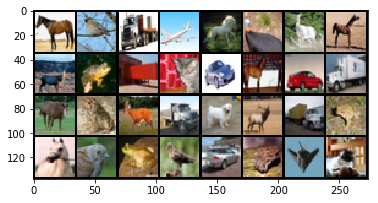

horse  bird truck plane horse  bird  deer horse  deer  frog truck   cat   car horse   car truck horse  frog  deer truck   dog  deer truck  frog horse  bird  frog  bird   car  frog plane   cat


In [20]:
def print_image(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# retrieve images from trainloader
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images 
print_image(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

Now try to build and train a plain neural network that properly classifies images in the CIFAR-10 dataset. Try to achieve at least around 40% accuracy (the higher the better!).

Take a look at the PyTorch documentation for some help in how to do this.

Google is your friend -- Looking things up on the PyTorch docs and on StackOverflow will be helpful.

In [21]:
import torch.nn as nn
import torch.nn.functional as F

# I was able to achieve ~45% accuracy with a CNN compared to ~11% with a plain NN, so I went with a CNN. 
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, data):
        x = self.pool(F.relu(self.conv1(data)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
import torch.optim as optim
from torch.autograd import Variable
EPOCHS = 2
LEARNING_RATE = 0.01

net = NeuralNet()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

print(net)

for epoch in range(EPOCHS):

    total_loss = 0

    for images, labels in trainloader:
        
        images, labels = Variable(images), Variable(labels)

        optimizer.zero_grad()

        outputs = net(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(trainloader)

correct = 0.0
total = 0.0
with torch.no_grad():
    for valdata in valloader:
        val_images, labels = valdata
        outputs = net(val_images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    val_acc = 100*correct/total
         
print("(epoch, train_loss, val_acc) = ({0}, {1}, {2})".format(epoch, average_loss, val_acc))

NeuralNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
(epoch, train_loss, val_acc) = (1, 1.4577490754868843, 50.28)


In [23]:
### YOUR CODE HERE - Here, we test the overall accuracy of our model.
correct = 0.0
total = 0.0
with torch.no_grad():
    for testdata in testloader:
        test_images, labels = testdata
        outputs = net(test_images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_acc = 100*correct/total
print("Test accuracy:", test_acc)

Test accuracy: 51.5


## Submission
For submiting, please download this notebook as a `.py` file. To do so, click on `File -> Download as -> Python (.py)`. Put the downloaded `assignment3.py` into this folder and commit the file.

## Additional Resources
If you're interested in using PyTorch as a framework for deep learning (especially for your final projects! We highly recommend you use this!), check out the PyTorch tutorials: https://pytorch.org/tutorials/. They have tutorials for everything from image to text to reinforcement learning tasks.